In [24]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
# load dataset
df = pd.read_csv("processed_house_price.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
1,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200


In [15]:
# define X and y
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]
X.head(), y.head()

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.24     37.85                  52         1467           190.0   
 1    -122.25     37.85                  52         1274           235.0   
 2    -122.25     37.85                  52         1627           280.0   
 3    -122.25     37.85                  52          919           213.0   
 4    -122.25     37.84                  52         2535           489.0   
 
    population  households  median_income  
 0         496         177         7.2574  
 1         558         219         5.6431  
 2         565         259         3.8462  
 3         413         193         4.0368  
 4        1094         514         3.6591  ,
 0    352100
 1    341300
 2    342200
 3    269700
 4    299200
 Name: median_house_value, dtype: int64)

In [31]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
print("Length of Training Data", len(X_train), len(y_train))
print("Length of Testing Data", len(X_test), len(y_test))

Length of Training Data 13947 13947
Length of Testing Data 3487 3487


In [33]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# define and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
y_pred[:5]

array([ 84314.74309379, 229278.42794013, 275324.23687476, 150771.93591951,
       228148.00845064])

In [36]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 43247.68536404417
Mean Squared Error (MSE): 3331671953.1626587
Root Mean Squared Error (RMSE): 57720.63715139204
R² Score: 0.6282078713556338


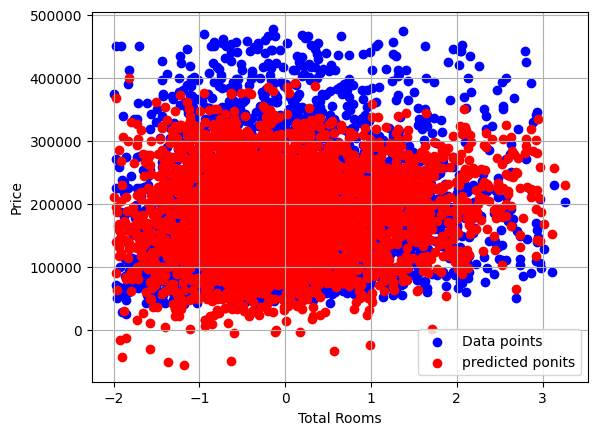

In [53]:
# Visulization
plt.scatter(X_test[:,4], y_test, c='b', label="Data points")
plt.scatter(X_test[:,4], y_pred, c='r', label="predicted ponits")
plt.xlabel("Total Rooms")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()